In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("mrr_movements_data.csv")
df.head()

,row_id,customer_id,movement_date,movement_type,mrr_movement_usd
0,1731.0,cus_4f5a71f4-3cfb-11e8-b586-934261bc42b1,2019-04-11,churn,-86.536800
1,349.0,cus_4eed342a-fa51-11e5-8a44-a3818de58ece,2016-11-10,churn,-140.667070
2,497.0,cus_dccbd792-9d09-11e5-aec2-9312d5786905,2017-04-12,churn,-68.544000
3,499.0,cus_400e4bbe-a58e-11e5-a3c8-2b51021d8285,2017-04-13,churn,-76.188146
4,680.0,cus_5d8219b0-5586-11e7-a28e-4b7a07d8f8f5,2017-09-10,churn,-75.707477


In [61]:
df.describe(include = 'all')

,row_id,customer_id,movement_date,movement_type,mrr_movement_usd
count,1988.000000,1988,2746,1988,1988.000000
unique,NaN,1118,1704,5,NaN
top,NaN,cus_79c41abe-9d0a-11e5-b3e7-eb4011b2d29f,2019-08-01,new_biz,NaN
freq,NaN,6,15,1118,NaN
mean,995.493461,NaN,NaN,NaN,72.619040
std,574.224749,NaN,NaN,NaN,172.526770
min,1.000000,NaN,NaN,NaN,-739.130520
25%,498.750000,NaN,NaN,NaN,-21.205800
50%,995.500000,NaN,NaN,NaN,64.045800
75%,1492.250000,NaN,NaN,NaN,127.872553


In [62]:
#df['mrr_month'] = 
#df.sort_values('movement_date')
df['month'] = df['movement_date'].str[0:7]
df.head()

,row_id,customer_id,movement_date,movement_type,mrr_movement_usd,month
0,1731.0,cus_4f5a71f4-3cfb-11e8-b586-934261bc42b1,2019-04-11,churn,-86.536800,2019-04
1,349.0,cus_4eed342a-fa51-11e5-8a44-a3818de58ece,2016-11-10,churn,-140.667070,2016-11
2,497.0,cus_dccbd792-9d09-11e5-aec2-9312d5786905,2017-04-12,churn,-68.544000,2017-04
3,499.0,cus_400e4bbe-a58e-11e5-a3c8-2b51021d8285,2017-04-13,churn,-76.188146,2017-04
4,680.0,cus_5d8219b0-5586-11e7-a28e-4b7a07d8f8f5,2017-09-10,churn,-75.707477,2017-09


In [63]:
df.set_index('movement_date', inplace=True)
df=df.sort_index()

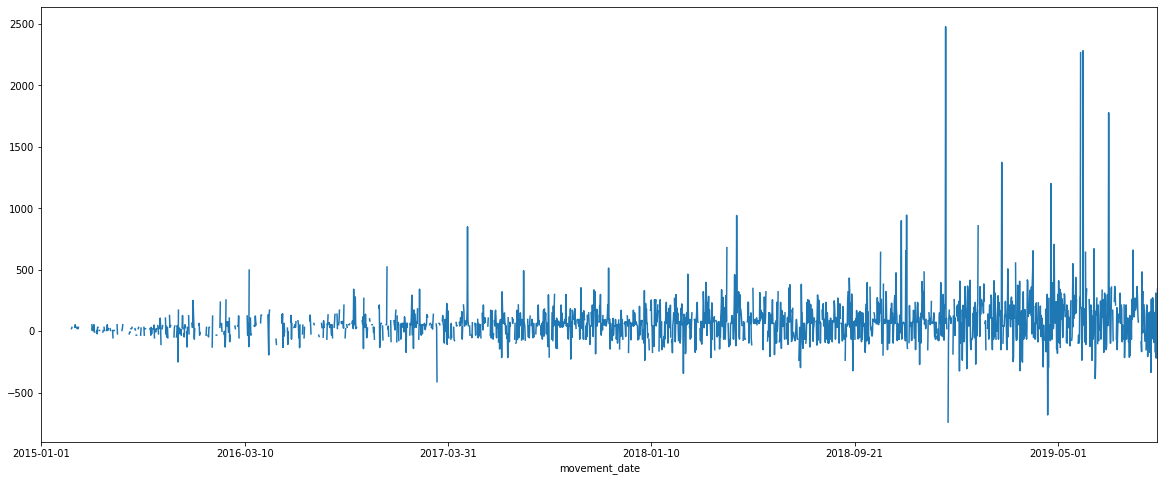

In [64]:
df['mrr_movement_usd'].plot(figsize=(20,8))

In [67]:
series1 = df.groupby(['month', 'movement_type'])['mrr_movement_usd'].sum()
type(series1)
df_sum = pd.DataFrame(series1)
type(df_sum)

pandas.core.frame.DataFrame

#

In [68]:
df_sum.head()

mrr_movement_usd
month   movement_type                  
2015-03 new_biz                425.4012
2015-04 churn                  -12.4236
        new_biz                248.6862
2015-05 contraction            -42.4116
        expansion               27.4176

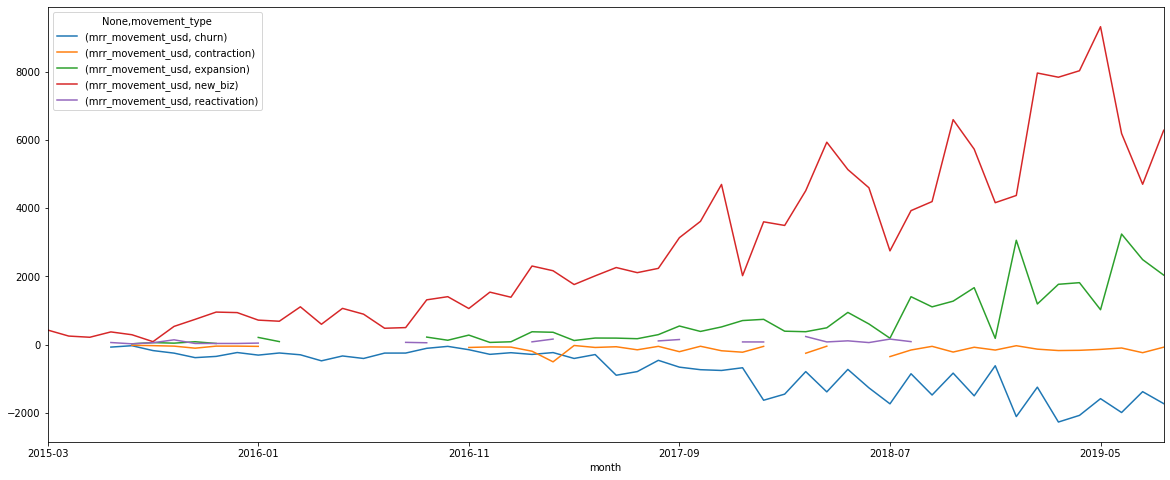

In [71]:
type(df_sum)
#df_sum.plot(legend=True, figsize=(20,8))
#df_sum.groupby('month')['mrr_movement_usd'].plot(legend=True, figsize=(20,8))
#df_sum['mrr_movement_usd'].plot(legend=True, figsize=(20,8))
df_sum\
    .groupby(['month', 'movement_type'])\
    .mean()\
    .unstack()\
    .plot(legend=True, figsize=(20,8))